# A2.1 Regresión logística y validación cruzada


Andrés Luna de la Garza #608994
<br><br>



<br><br>
1. Importa los datos a tu ambiente de trabajo. Especifica qué variable utilizarás como
variable de salida, debe tratarse de una variable binaria. Si no hay ninguna variable
binaria de interés, binariza la variable de salida que utilizaste en el proyecto (si trataste
de predecir el precio de las casas, genera una variable que indique si una casa cuesta
más que cierto monto, o menos).
.  <br><br>

In [71]:
import pandas as pd
data= pd.read_csv("DataR2.csv")
data["y_bin"]=(data["Classification"]==2).astype(int)
X= data.drop(["Classification", "y_bin"], axis=1)
y= data["y_bin"]
print(data.head(100))

    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0    48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1    83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2    82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3    68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4    86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..  ...        ...      ...      ...       ...      ...          ...   
95   49  29.777778       70    8.396  1.449709  51.3387    10.731740   
96   44  27.887617       99    9.208  2.248594  12.6757     5.478170   
97   40  27.636054      103    2.432  0.617890  14.3224     6.783870   
98   71  27.915519      104   18.200  4.668907  53.4997     1.656020   
99   69  28.444444      108    8.808  2.346451  14.7485     5.288025   

    Resistin    MCP.1  Classification  y_bin  
0    7.99585  417.114               1      0  
1    4.06405  468.786               1    

<br><br>
Aquí se importa la librería implementada en la actividad prevía y se crea la variable binaria y_bin, que toma el valor 1 si Classification == 2, y 0 en caso contrario para poder analizar los datos.  <br><br>

<br><br>
2. Separa los datos en entrenamiento y prueba, con una relación de 80/20. Asegúrate de
mantener un balance de clases (es decir, si en la base de datos hay 70% de
observaciones de clase 0 y 30% de observaciones de clase 1, deberá mantenerse una
proporción muy similar tanto en los datos de entrenamiento como en los de prueba), e
imprime en consola las proporciones para los 3 grupos (datos originales, datos de
entrenamiento, datos de prueba).


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
print("Proporciones en datos originales:")
print(y.value_counts(normalize=True))

print("\nProporciones en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporciones en prueba:")
print(y_test.value_counts(normalize=True))

Proporciones en datos originales:
y_bin
1    0.551724
0    0.448276
Name: proportion, dtype: float64

Proporciones en entrenamiento:
y_bin
1    0.554348
0    0.445652
Name: proportion, dtype: float64

Proporciones en prueba:
y_bin
1    0.541667
0    0.458333
Name: proportion, dtype: float64


<br><br>
Se divide el conjunto de datos en entrenamiento (80%) y prueba (20%) y se imprimen las proporciones de datos originales, entrenamiento y prueba.  <br><br>

<br><br>3. Usando los datos de entrenamiento, mide la exactitud de un modelo de regresión logística
usando alguna técnica de validación cruzada. Si tu base de datos era particularmente
compleja, puedes trabajar con 5 características de interés, en vez de con toda la base de
datos, o de tener que realizar un proceso de selección de características

<br><br>

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression(penalty=None, class_weight="balanced", max_iter=1000, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"\nExactitud por fold: {scores}")
print(f"Exactitud promedio: {np.mean(scores):.3f}")


Exactitud por fold: [0.63157895 0.68421053 0.72222222 0.88888889 0.83333333]
Exactitud promedio: 0.752


<br><br>
En este apartado se crea un modelo de Regresión Logística y se evalúa con validación cruzada de 5 folds.  <br><br>

<br><br>4. Entrena un modelo de regresión logística, similar al del punto anterior, pero utilizando
todo el subconjunto de datos de entrenamiento. Usando dicho modelo, genera un vector
de probabilidades para los datos de prueba. Genera una matriz de confusión y reporta la
exactitud, sensibilidad y especificidad del modelo antes 3 diferentes umbrales (0.5, uno
mayor, y uno menor).
<br><br>


Umbral = 0.3
Exactitud: 0.792 -> 79%
Sensibilidad: 0.846 -> 85%
Especificidad: 0.727 -> 73%


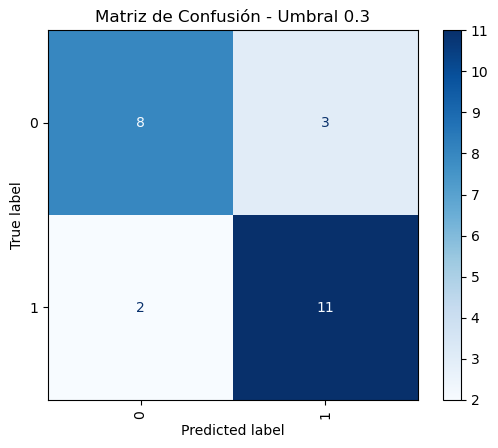


Umbral = 0.5
Exactitud: 0.750 -> 75%
Sensibilidad: 0.692 -> 69%
Especificidad: 0.818 -> 82%


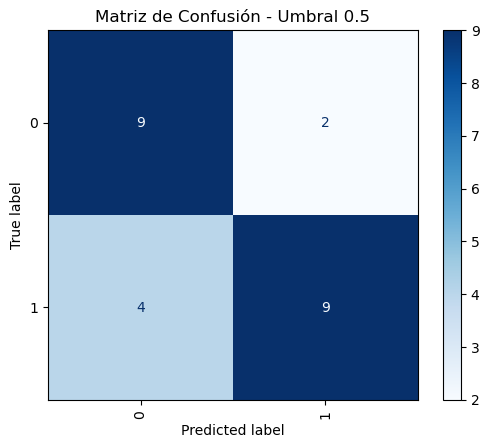


Umbral = 0.7
Exactitud: 0.583 -> 58%
Sensibilidad: 0.385 -> 38%
Especificidad: 0.818 -> 82%


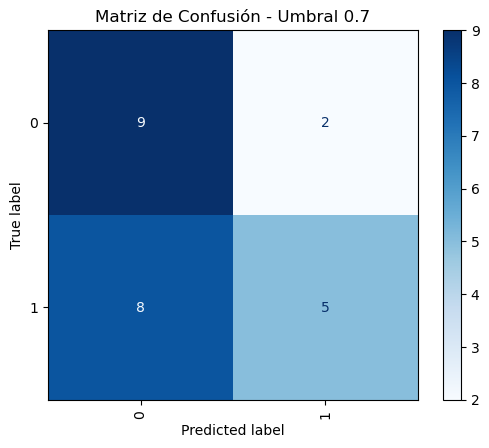

In [74]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score)
import matplotlib.pyplot as plt
%matplotlib inline
model.fit(X_train, y_train)

# Obtener probabilidades para datos de prueba
probas = model.predict_proba(X_test)[:, 1]

# Definir umbrales
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    # Aplicar umbral
    preds = (probas >= t).astype(int)
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, preds)
    
    # Métricas simplificadas
    acc = accuracy_score(y_test, preds)
    sens = recall_score(y_test, preds, average='binary', zero_division=0)  # Sensibilidad/Recall
    spec = recall_score(y_test, preds, average='binary', pos_label=0, zero_division=0)  # Especificidad
    
    print(f"\n{'='*50}")
    print(f"Umbral = {t}")
    print(f"Exactitud: {acc:.3f} -> {acc*100:.0f}%")
    print(f"Sensibilidad: {sens:.3f} -> {sens*100:.0f}%")
    print(f"Especificidad: {spec:.3f} -> {spec*100:.0f}%")
    cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmd.plot(xticks_rotation="vertical", cmap='Blues')
    plt.title(f'Matriz de Confusión - Umbral {t}')
    plt.show()

<br><br>
Después, el modelo de Regresión Logística se entrena con los datos de entrenamiento (X_train, y_train). También, se calculan las métricas de accuracy, specificity y sensitivity. Adicionalmente, se ve representada la matriz de confusión de dichos casos.  <br><br>

<br><br>5. Grafica la curva ROC para las probabilidades calculadas en el punto previo y reporta el
valor de la AUC.
<br><br>

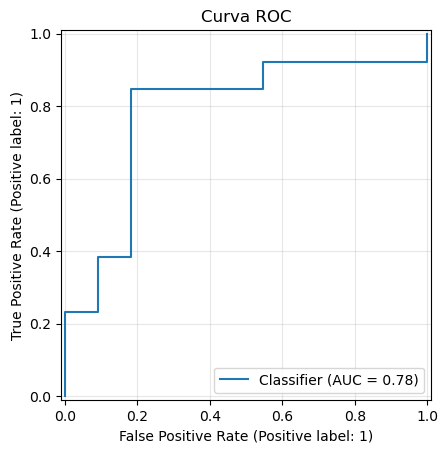

El área bajo la curva ROC es: 0.7832
Dicho valor indica que el modelo logra una buena capacidad de discriminación entre las dos clases, sin ser perfecto (=!1).


In [77]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
fpr, tpr, thresholds_roc = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)
RocCurveDisplay.from_predictions(y_test, probas)
plt.title('Curva ROC')
plt.grid(True, alpha=0.3)
plt.show()

# Reportar el valor de AUC
print(f"El área bajo la curva ROC es: {roc_auc:.4f}")
print("Dicho valor indica que el modelo logra una buena capacidad de discriminación entre las dos clases, sin ser perfecto (=!1).")

<br><br>
Como se puede observar, se calcula la curva ROC y el área bajo la curva, dando así un valor de 0.78. <br><br>

<br><br>6. Interpreta los resultados del modelo, describiendo cómo es que cada variable afecta a la
salida, en términos de los coeficientes generados.

<br><br>

In [78]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print(coef_df)
print(" ")
print(" ")
print("Tomando en cuenta el resultado del modelo, se observa que las variables Insulin y Glucose tienen un efecto positivo importante sobre la probabilidad de pertenecer a la clase positiva (paciente con condición), con coeficientes de 0.30 y 0.14, respectivamente. En otras palabras, a mayores valores de insulina y glucosa, aumenta la probabilidad de ser clasificado como paciente con condición.")
print("Por otro lado, las variables HOMA y BMI presentan coeficientes negativos (-1.03 y -0.10, respectivamente), lo que se interpreta como una reducción en la probabilidad de pertenecer a la clase positiva. Finalmente, las variables Age, Leptin, MCP.1 y Adiponectin muestran coeficientes muy cercanos a 0, lo que indica que su influencia en la salida del modelo es débil.")


      Variable  Coeficiente
3      Insulin     0.300986
2      Glucose     0.147679
7     Resistin     0.050303
8        MCP.1     0.000446
6  Adiponectin    -0.008841
0          Age    -0.022707
5       Leptin    -0.029853
1          BMI    -0.103868
4         HOMA    -1.035864
 
 
Tomando en cuenta el resultado del modelo, se observa que las variables Insulin y Glucose tienen un efecto positivo importante sobre la probabilidad de pertenecer a la clase positiva (paciente con condición), con coeficientes de 0.30 y 0.14, respectivamente. En otras palabras, a mayores valores de insulina y glucosa, aumenta la probabilidad de ser clasificado como paciente con condición.
Por otro lado, las variables HOMA y BMI presentan coeficientes negativos (-1.03 y -0.10, respectivamente), lo que se interpreta como una reducción en la probabilidad de pertenecer a la clase positiva. Finalmente, las variables Age, Leptin, MCP.1 y Adiponectin muestran coeficientes muy cercanos a 0, lo que indica que su infl

<br><br>
Finalmente, se consiguen los coeficientes respectivos de la base de datos y se interpretan los impactos de estos mismos al ser positivos y negativos. <br><br>

<br>Código de Honor: Yo, Andrés Luna de la Garza, doy mi palabra que he realizado esta actividad con integridad académica